In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm

plt.style.use('seaborn-darkgrid')

In [2]:
num_trials_a = 30  # n
observed_conversions_a = 10 # d

# what is p (our conversion rate)?

In [3]:
with pm.Model() as a_model:
    a_conversion_rate = pm.Beta('a_rate', alpha=1.0, beta=1.0)
  
#    a_conversion_rate = pm.Uniform('a_rate',val=.33)
    
    expected_a_conversions = pm.Binomial('a_conversions', 
                                         num_trials_a, 
                                         a_conversion_rate, 
                                         observed=observed_conversions_a)

In [4]:
with a_model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_rate]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5221.77draws/s]
The acceptance probability does not match the target. It is 0.8857873348017617, but should be close to 0.8. Try to increase the number of tuning steps.


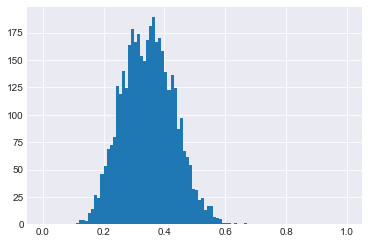

In [5]:
_ = plt.hist(trace['a_rate'], bins=100, range=(0,1))

In [6]:
trace.varnames

['a_rate_logodds__', 'a_rate']

# A/B Test

In [7]:
conversions_a = 100
total_a = 300

conversions_b = 10
total_b = 25

print(f'MLE conversion Rate A: {conversions_a / total_a}')
print(f'MLE conversion Rate B: {conversions_b / total_b}')

MLE conversion Rate A: 0.3333333333333333
MLE conversion Rate B: 0.4


In [8]:
with pm.Model() as ab_model:
    a_rate = pm.Uniform('a_rate')
    a_conversions = pm.Binomial('a_conversions', total_a, a_rate, observed=conversions_a)
    
    b_rate = pm.Uniform('b_rate')
    b_conversions = pm.Binomial('b_conversions', total_b, b_rate, observed=conversions_b)

In [9]:
with ab_model:
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_rate, a_rate]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:09<00:00, 4567.23draws/s]


/Users/julio/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


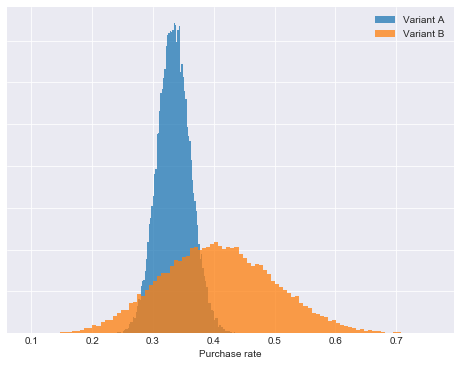

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

bins = 100

ax.hist(trace['a_rate'],
        bins=bins, normed=True, lw=0, alpha=0.75,
        label="Variant A");
ax.hist(trace['b_rate'],
        bins=bins, normed=True, lw=0, alpha=0.75,
        label="Variant B");

ax.set_xlabel('Purchase rate');
ax.set_yticklabels([]);
ax.legend();

In [11]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
a_rate,0.334494,0.027196,0.000118,0.280669,0.387686,43185.177543,0.999960
b_rate,0.407384,0.092309,0.000422,0.228565,0.587167,42480.361735,0.999971


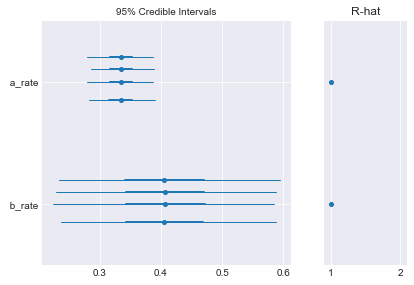

In [12]:
pm.forestplot(trace)

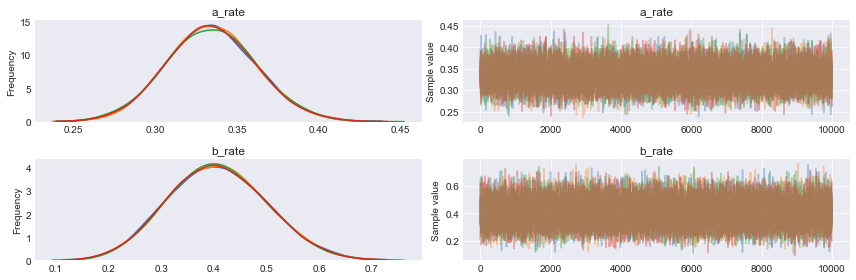

In [13]:
_ = pm.traceplot(trace)